In [ ]:
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
from keras.utils import np_utils

n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'valid', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    batch_size = 32,
                    epochs = 2, 
                    validation_data=(X_test, Y_test))

Epoch 1/2
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1560 - accuracy: 0.9536 - val_loss: 0.0687 - val_accuracy: 0.9783
Epoch 2/2
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0517 - val_accuracy: 0.9833


In [ ]:
def plot_loss_accuracy():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.show()

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

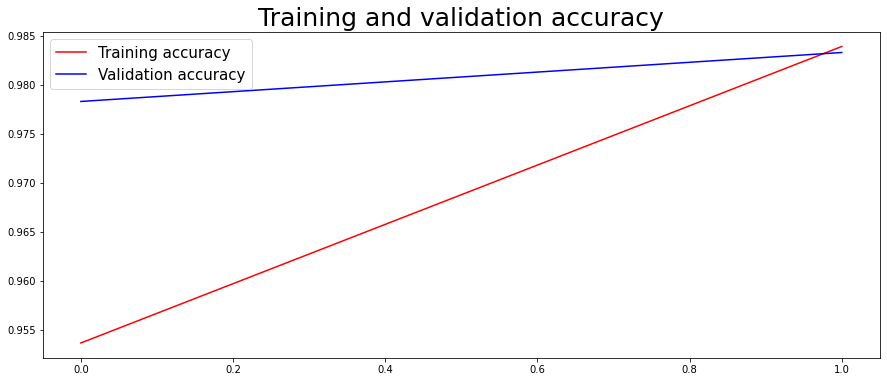

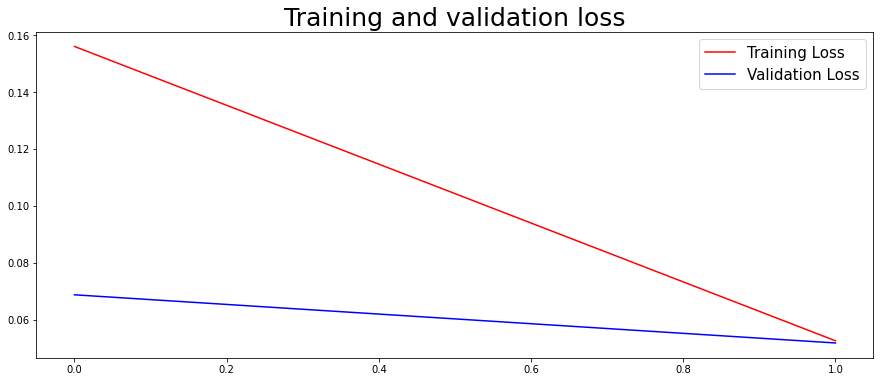

In [ ]:
plot_loss_accuracy()

# **On CiFAR10 Dataset**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

In [ ]:
Y_train.shape, Y_test.shape

((50000, 10), (10000, 10))

In [ ]:
model = Sequential()
model.add(Conv2D(16, padding = 'same', activation = 'relu', kernel_size=(3,3), input_shape = (32,32,3)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)                262208    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 263,306
Trainable params: 263,306
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'],
              loss = 'categorical_crossentropy')

In [ ]:
history = model.fit(X_train,
                    Y_train,
                    epochs = 2,
                    batch_size = 16,
                    validation_data = (X_test, Y_test)
    
)

Epoch 1/2
2663/3125 [========================>.....] - ETA: 6s - loss: 1.4768 - accuracy: 0.4699

KeyboardInterrupt: ignored

In [ ]:
def plot_loss_accuracy():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.figure(figsize = (15, 6))

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss', fontsize = 25)
  plt.legend(loc = 'best', fontsize = 15)

  plt.show()

In [ ]:
plot_loss_accuracy()

# **Linear Regression**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


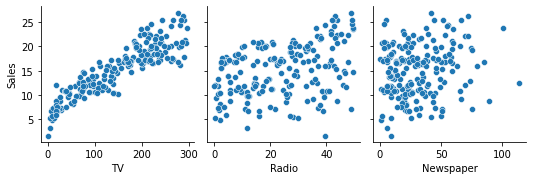

In [ ]:
import seaborn as sns
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter')

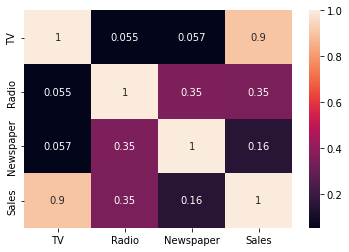

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
X = df['TV']
y = df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140,), (140,), (60,), (60,))

In [ ]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
lr.params

const    7.160173
TV       0.053385
dtype: float64

In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     616.7
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           9.12e-53
Time:                        06:38:52   Log-Likelihood:                -307.27
No. Observations:                 140   AIC:                             618.5
Df Residuals:                     138   BIC:                             624.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1602      0.367     19.500      0.000       6.434       7.886
TV             0.0534      0.002     24.833      0.000       0.049       0.058
==============================================================================
Omnibus:                        0.668   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.582
Skew:                           0.157   Prob(JB):                        0.747
Kurtosis:                       2.971   Cond. No.                         339.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(np.sqrt(mean_squared_error(y_test, y_pred)))

2.5563318549863134


In [ ]:
print(r2_score( y_test, y_pred))

0.797759312541617


# *Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since we have already performed a train-test split, we don’t need to do it again.*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160,), (160,), (40,), (40,))

In [ ]:
X_train = X_train.values.reshape(-1,1)
X_train.shape

(160, 1)

In [ ]:
X_test = X_test.values.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[0.05548294]
7.007108428241848


In [ ]:
y_test = y_test.values.reshape(-1,1)

In [ ]:
pred = lr.predict(X_test)
pred = pd.DataFrame({'Actual': [i for i in y_test], 'Predicted': [j for j in pred]})
pred.head()

,Actual,Predicted
0,[16.9],16.067473
1,[22.4],17.848476
2,[21.4],23.258063
3,[7.3],7.656259
4,[24.7],19.230001


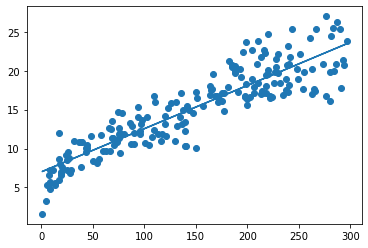

In [ ]:
line = lr.coef_*X + lr.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# **Practice**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


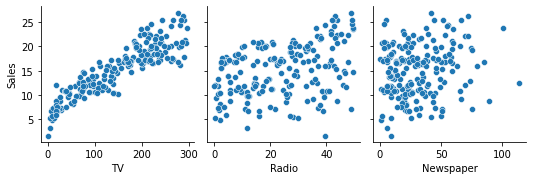

In [ ]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = ['Sales'], kind = 'scatter')

In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


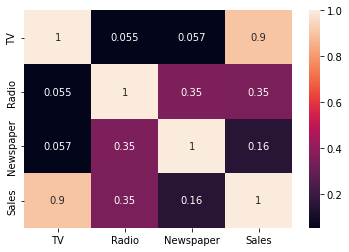

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
X = df['TV']
y = df['Sales']

In [ ]:
X = X.values
y = y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((134,), (66,), (134,), (66,))

In [ ]:
X_train = X_train.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train.shape

(134, 1)

In [ ]:
X_test = X_test.reshape(-1,1)

In [ ]:
pred = lr.predict(X_test)
pred = pd.DataFrame({'Actual': [i for i in y_test], 'Predicted': [j for j in pred]})
pred.head()

,Actual,Predicted
0,16.6,[18.014392364832972]
1,10.7,[12.574918599726871]
2,20.7,[17.076735770652096]
3,14.8,[16.655855822127727]
4,8.4,[9.88981108002709]


In [ ]:
X.shape, y.shape

((200,), (200,))

In [ ]:
y_test.shape

(66,)

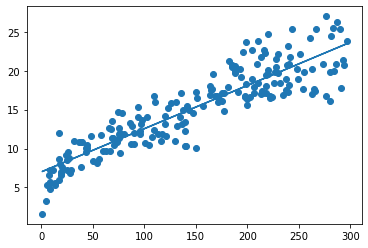

In [ ]:
line = lr.coef_*X + lr.intercept_
line = line.values.reshape(-1)
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

# **Decision Tree**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


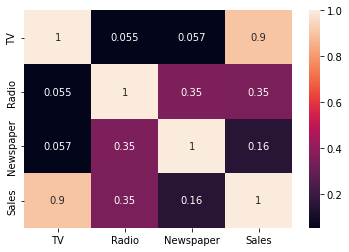

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#lagbena ekhane tobe sikhe rakha uchit
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

In [ ]:
X = df.iloc[:, 0:3]
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = df.iloc[:,3]
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
y = y.values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140, 1), (60, 1))

In [ ]:
decisiontree = DecisionTreeRegressor()
decisiontree.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred = decisiontree.predict(X_test)
output = pd.DataFrame({'Actual': [i for i in y_test], 'Predicted': [j for j in pred]})
output.head()

,Actual,Predicted
0,[16.9],18.0
1,[22.4],23.8
2,[21.4],19.6
3,[7.3],5.6
4,[24.7],23.8


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
y_test.shape, pred.shape

((60, 1), (60,))

In [ ]:
X_train.shape

(140, 3)

In [ ]:
decisiontree.score(y_test, pred)

1.0

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 1.39
Mean Squared Error: 3.018333333333333
Root Mean Squared Error: 1.7373351240717299


# **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


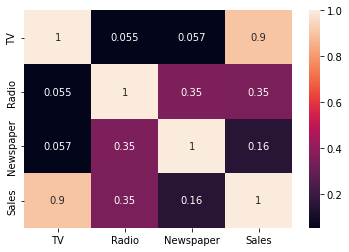

In [ ]:
sns.heatmap(df.corr(), annot = True, color = 'blue')

In [ ]:
X = df.drop(['Sales'], axis = 1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
y = df['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [ ]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logr.predict(X_test)

array([16, 16, 11, 16, 16, 16, 16, 16, 10, 10, 16, 16, 10, 16, 10, 16, 20,
       16, 16, 16, 16, 10, 20, 16, 20, 16, 16, 10, 10, 10, 16, 20, 16, 16,
       16, 20, 16, 10, 10, 10, 22, 11, 16, 16, 22, 16,  7, 10, 11, 16, 16,
       16, 16, 10, 22, 11, 20, 16, 16, 16])

In [ ]:
pred = logr.predict(X_test)
output = pd.DataFrame({'Actual': [i for i in y_test], 'Predicted': pred})
output.head()

,Actual,Predicted
0,19,16
1,16,16
2,4,11
3,11,16
4,17,16


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(np.sqrt(mean_absolute_error(y_test, pred)))
print(r2_score(y_test, pred))

1.8841443681416772
0.24326280386563925


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.08      0.33      0.12         3
          11       0.50      0.40      0.44         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         5
          16       0.03      0.20      0.05         5
          17       0.00      0.00      0.00        10
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         6
          20       0.17      0.20      0.18         5
          22       0.00      0.00      0.00         2
          23       0.00    

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 8 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]]


In [ ]:
inp = [[10]]
out = logr.predict(inp)
print(out)

ValueError: ignored

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
df = pd.read_csv('/content/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [ ]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [ ]:
df.value_counts()

age  sex  BP   cholestrol  heart disease
29   1    130  204         0                1
59   1    178  270         0                1
58   1    140  211         0                1
          146  218         1                1
          150  270         1                1
                                           ..
51   1    140  261         0                1
               298         1                1
               299         1                1
52   0    136  196         0                1
77   1    125  304         1                1
Length: 270, dtype: int64

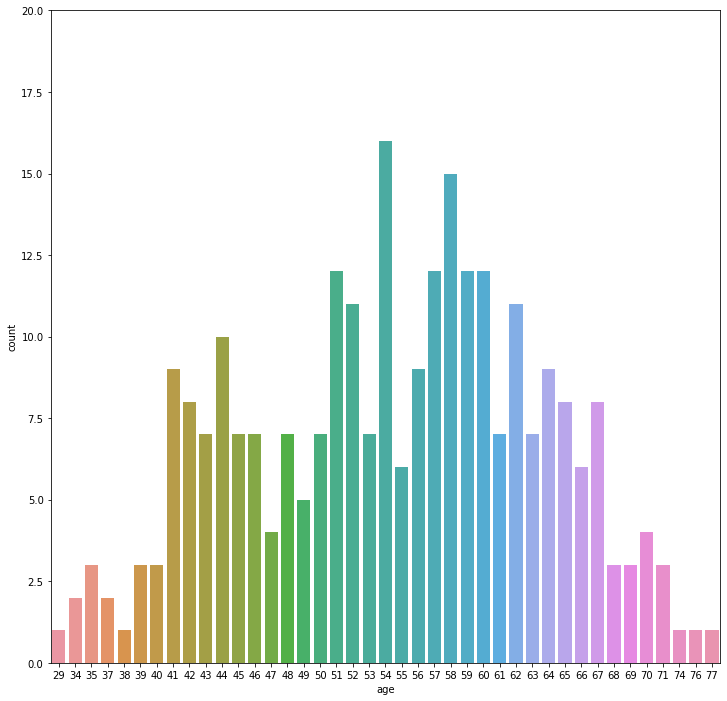

In [ ]:
fig, ax = plt.subplots(figsize = (12,12)) 
sns.countplot(x = 'age', data = df)
ax.set_ylim(0,20)
plt.show()

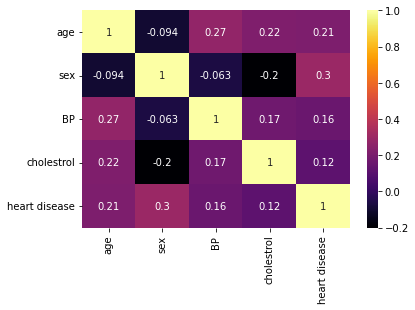

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'inferno')

In [ ]:
X = df.drop('heart disease', axis = 1)
y = df['heart disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 4), (81, 4), (189,), (81,))

In [ ]:
params = {
    'n_estimators':[100,200],
    'max_depth' : [2,3,4,5,6,7] 
}

In [ ]:
rand_c = RandomForestClassifier(random_state = 1, max_depth = 5, n_estimators = 100, oob_score = True)

In [ ]:
rand_c.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=1)

In [ ]:
rand_c.oob_score_

0.6455026455026455

In [ ]:
grid_search = GridSearchCV(estimator = rand_c,
                           param_grid = params,
                           cv =4,
                           n_jobs = -1,
                           scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=5, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
grid_search.best_score_

0.65625

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, oob_score=True, random_state=1)

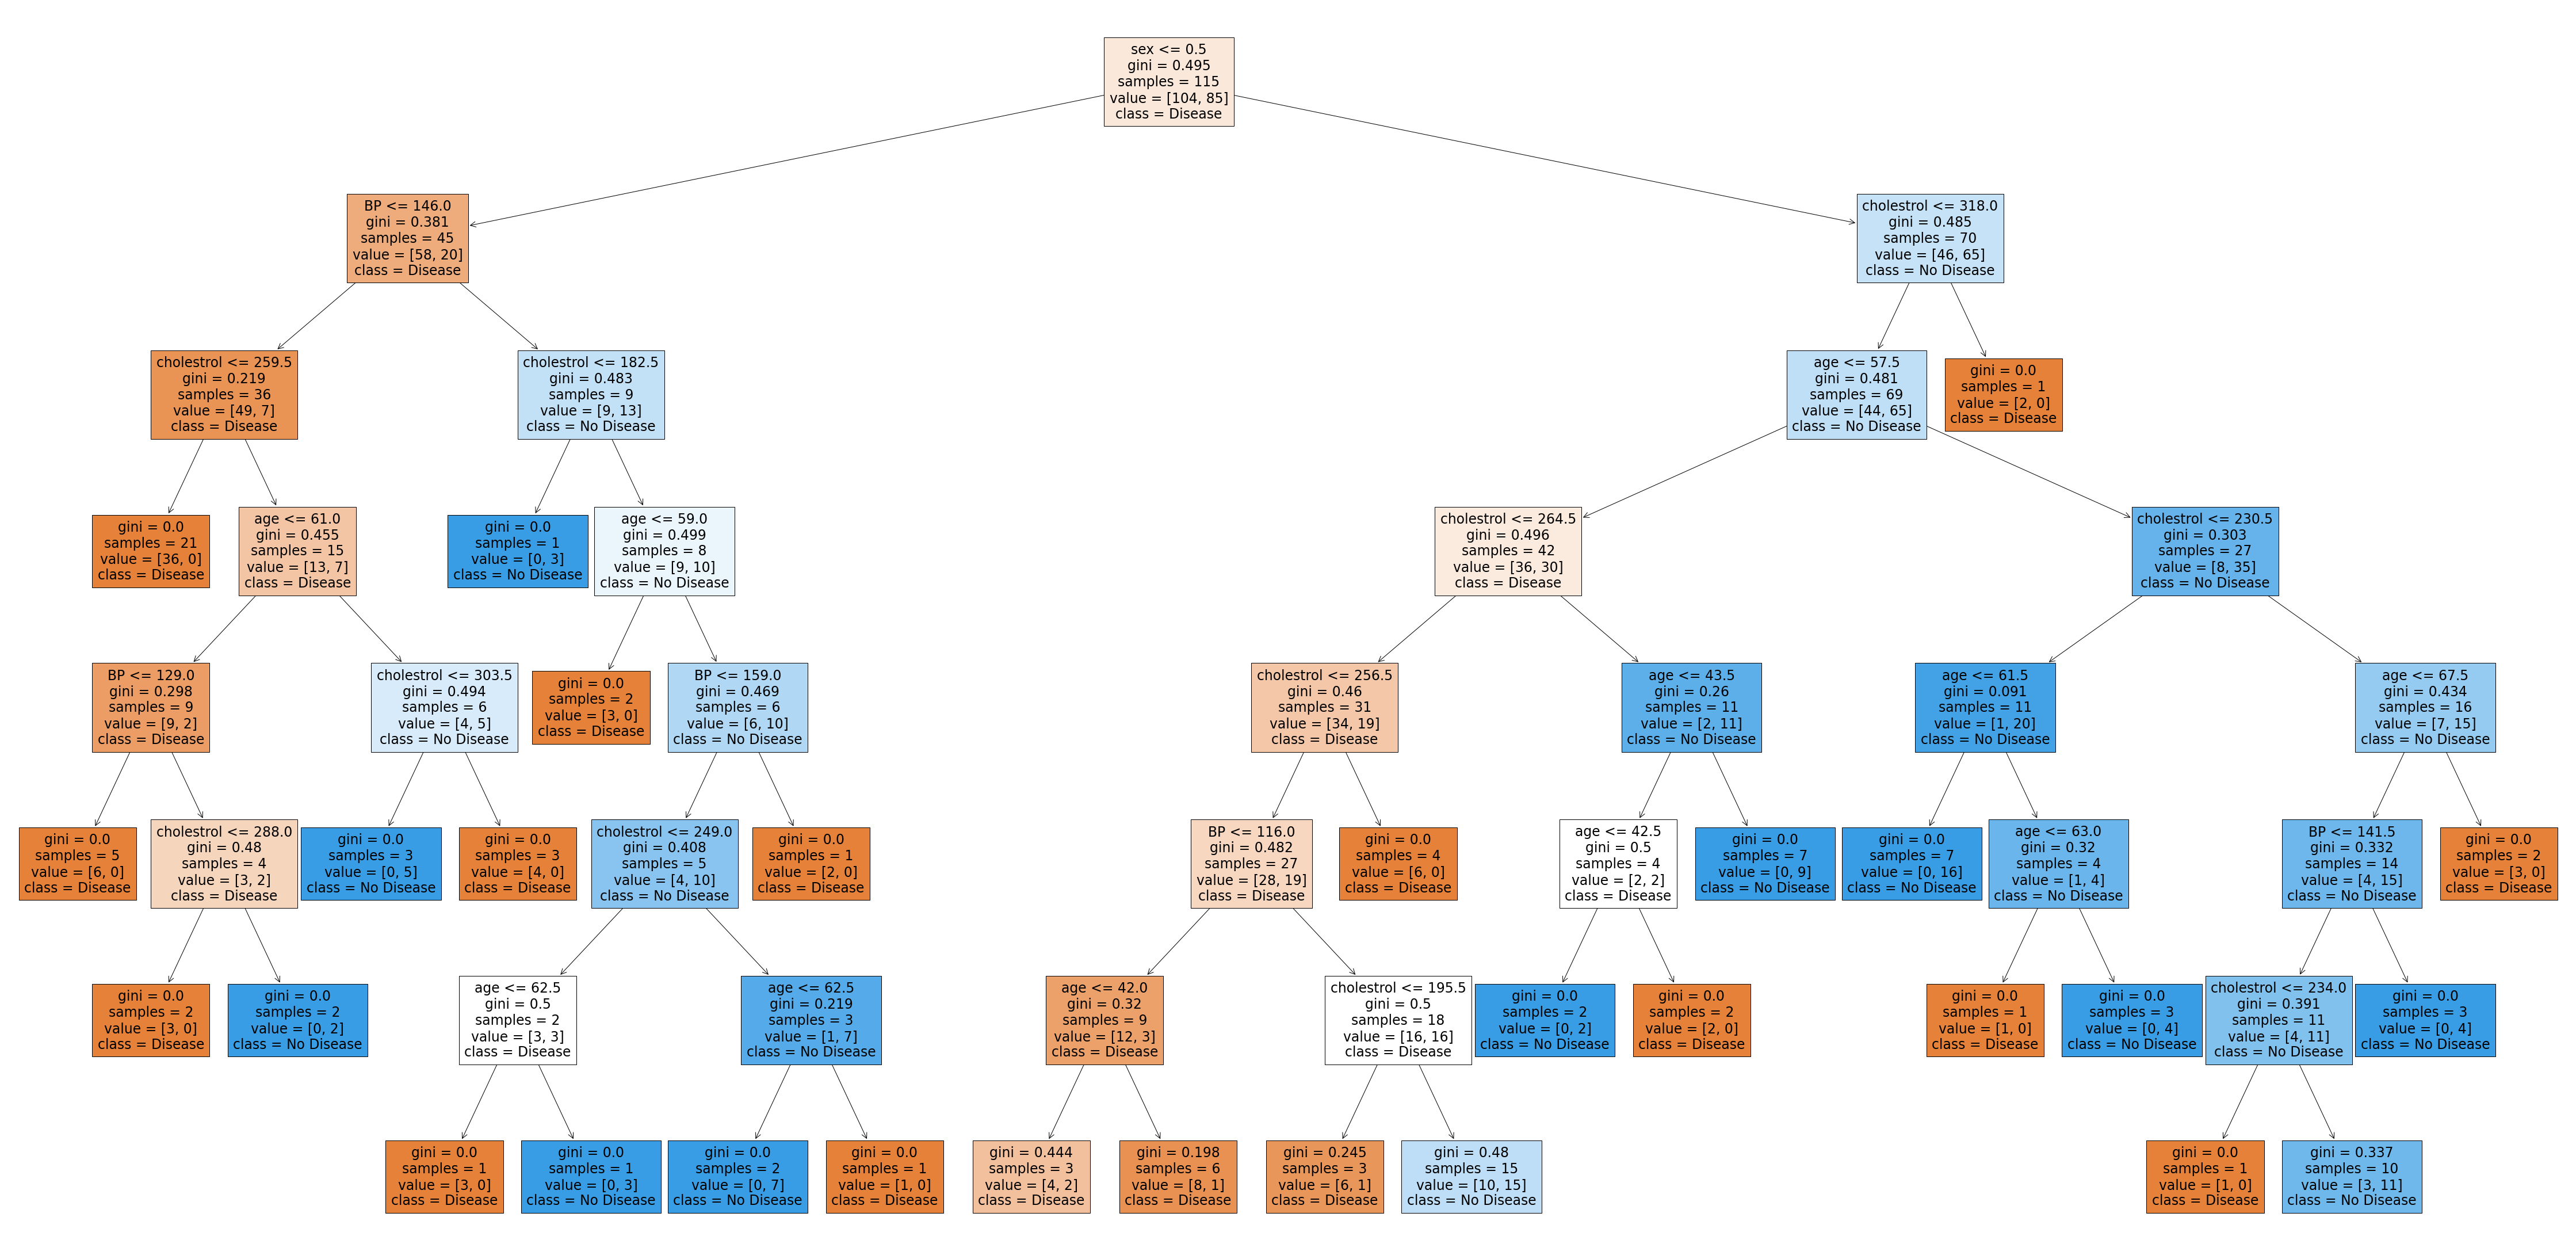

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(grid_search.best_estimator_.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [ ]:
grid_search.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [ ]:
imp = grid_search.best_estimator_.feature_importances_
imp

array([0.33051168, 0.13488393, 0.21988908, 0.3147153 ])

In [ ]:
f_imp = pd.DataFrame({'features': X.columns, 'importance': imp})
f_imp = f_imp.sort_values(by = 'importance', ascending = False)
f_imp

,features,importance
0,age,0.330512
3,cholestrol,0.314715
2,BP,0.219889
1,sex,0.134884


In [ ]:
y_pred = rand_c.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[29, 13],
       [15, 24]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67        42
           1       0.65      0.62      0.63        39

    accuracy                           0.65        81
   macro avg       0.65      0.65      0.65        81
weighted avg       0.65      0.65      0.65        81



# **XGBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


In [ ]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

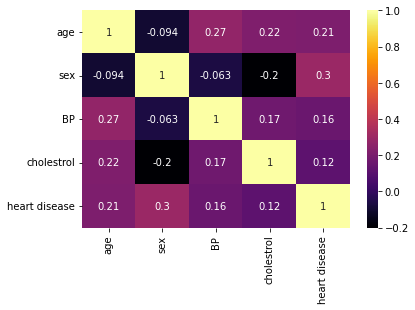

In [ ]:
sns.heatmap(df.corr(method = 'pearson'), annot = True, cmap = 'inferno')

In [ ]:
X = df.drop('heart disease', axis=1)
y = df['heart disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
xgb_c = XGBClassifier()
xgb_c.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_c.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6296296296296297


In [ ]:
params = {
    'max_depth':[6,7,8,9,10],
    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3]
}

In [ ]:
grid_search = GridSearchCV(xgb_c,
                           cv = 5,
                           param_grid = params,
                           scoring = 'accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [6, 7, 8, 9, 10]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 10}

In [ ]:
grid_search.best_score_

0.6803382663847779

In [ ]:
xgb_c = XGBClassifier(learning_rate =  0.05, max_depth = 10)

In [ ]:
xgb_c.fit(X_train, y_train)

XGBClassifier(learning_rate=0.05, max_depth=10)

In [ ]:
y_pred = xgb_c.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6481481481481481


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[24  9]
 [10 11]]


In [ ]:
res = pd.DataFrame({'Actual': [i for i in y_test], 'Predicted':[j for j in y_pred]})
res.head()

,Actual,Predicted
0,1,1
1,1,0
2,0,1
3,0,0
4,0,0


In [ ]:
testing = pd.DataFrame({'age': int(input()), 'sex': int(input()), 'BP': int(input()), 'cholestrol': int(input())}, index=[0])
testing

50
0
90
229


,age,sex,BP,cholestrol
0,50.0,0,90.0,229.0


In [ ]:
pred = xgb_c.predict(testing)
pred

array([0])

# **K-Nearest Neighbor**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/heart_v2.csv')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df.drop('heart disease', axis = 1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('heart disease', axis = 1))

In [ ]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])
df_feat.head()

,age,sex,BP,cholestrol
0,1.712094,0.689500,-0.075410,1.402212
1,1.382140,-1.450327,-0.916759,6.093004
2,0.282294,0.689500,-0.411950,0.219823
3,1.052186,0.689500,-0.187590,0.258589
4,2.152032,-1.450327,-0.636310,0.374890


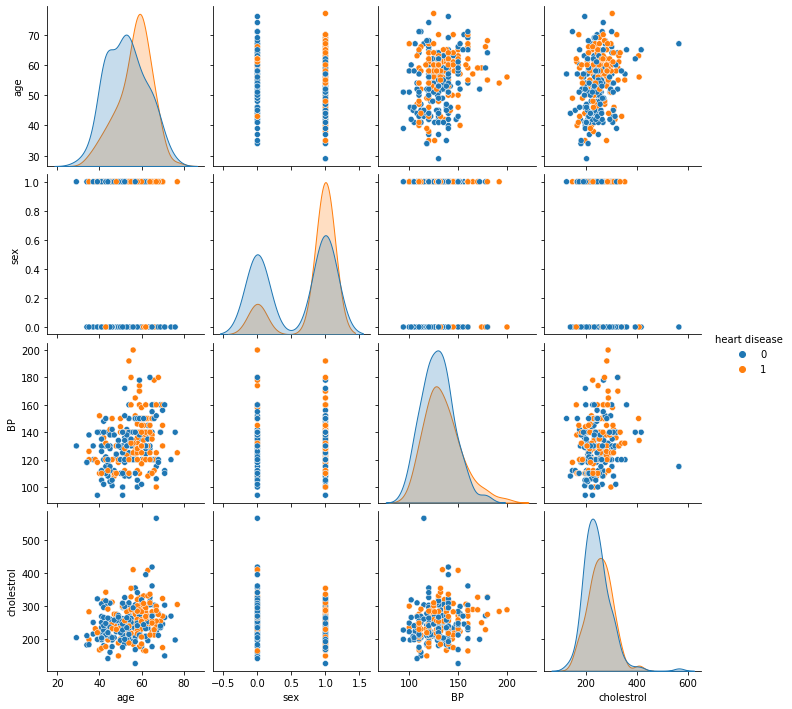

In [ ]:
sns.pairplot(df, hue = 'heart disease')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['heart disease'], test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((180, 4), (90, 4), (180,), (90,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred))

0.5555555555555556


In [ ]:
print(confusion_matrix(y_test, pred))

[[34 20]
 [20 16]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        54
           1       0.44      0.44      0.44        36

    accuracy                           0.56        90
   macro avg       0.54      0.54      0.54        90
weighted avg       0.56      0.56      0.56        90



In [ ]:
from sklearn.model_selection import cross_val_score

acc_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(knn, df_feat, df['heart disease'], cv = 10)
  acc_rate.append(np.mean(score))

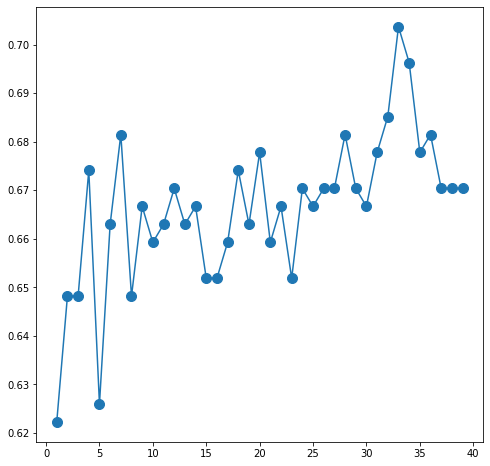

In [ ]:
plt.figure(figsize = (8,8))
plt.plot(range(1,40), acc_rate, marker = 'o', markersize = 10)
plt.show()

In [ ]:
error_rate = []

for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors = i)
  score = cross_val_score(knn, df_feat, df['heart disease'], cv = 10)
  error_rate.append(1-np.mean(score))

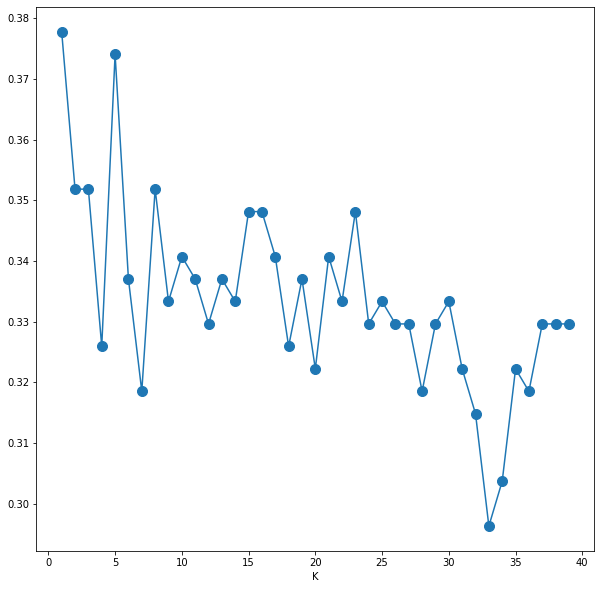

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1,40), error_rate, marker = 'o', markersize = 10)
plt.xlabel('K')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 33)
knn.fit(X_train, y_train)
predicted = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, predicted))

[[40 14]
 [15 21]]


In [ ]:
print(accuracy_score(y_test, predicted))

0.6777777777777778


In [ ]:
print(classification_report(y_test, predicted, digits = 3))

              precision    recall  f1-score   support

           0      0.727     0.741     0.734        54
           1      0.600     0.583     0.592        36

    accuracy                          0.678        90
   macro avg      0.664     0.662     0.663        90
weighted avg      0.676     0.678     0.677        90



# **Ridge and Lasso Regression**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
df = load_boston()
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
dataset = pd.DataFrame(df.data)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset.columns = df.feature_names

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
dataset['price'] = df.target

In [ ]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
X.shape, y.shape

((506, 13), (506,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
lr = LinearRegression()
mse = cross_val_score(lr, X, y, scoring  = 'neg_mean_squared_error', cv = 10)
print(np.mean(mse))

-34.705255944524914


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha': [1e-10, 1e-5, 1e-2, 1e-1, 1, 2, 5, 10, 20, 50, 100]}
ridge = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 10)
ridge.fit(X, y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.1, 1, 2, 5, 10, 20, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge.best_params_)
print(ridge.best_score_)

{'alpha': 100}
-29.61522009733517


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
params = {'alpha': [1e-10, 1e-5, 1e-2, 1e-1, 1, 2, 5, 10, 20, 50, 100]}
lasso = GridSearchCV(lasso, params, scoring  = 'neg_mean_squared_error', cv = 10)
lasso.fit(X, y)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-05, 0.01, 0.1, 1, 2, 5, 10, 20, 50,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(lasso.best_params_)
print(lasso.best_score_)

{'alpha': 0.1}
-34.17996192308159


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
pred_ridge = ridge.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


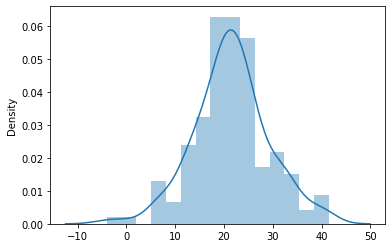

In [ ]:
sns.distplot(pred_ridge)

In [ ]:
pred_lasso = lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


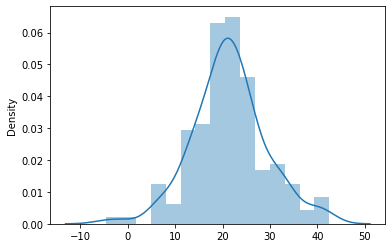

In [ ]:
sns.distplot(pred_lasso)

# **Statistics**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['tip'])

2.99827868852459

In [ ]:
np.median(df['tip'])

2.9

In [ ]:
statistics.mode(df['tip'])

2.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


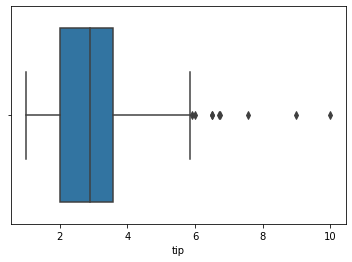

In [ ]:
sns.boxplot(df['tip'])

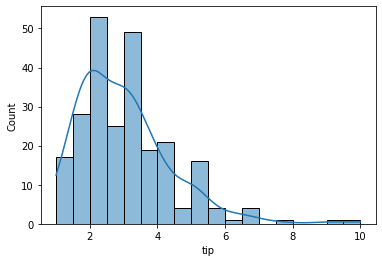

In [ ]:
sns.histplot(df['tip'], kde = True)

So, it is not a Gaussian distribution/Normal distribution

In [ ]:
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
np.mean(df1['sepal_width'])

3.7580000000000005

In [ ]:
np.median(df1['sepal_width'])

4.35

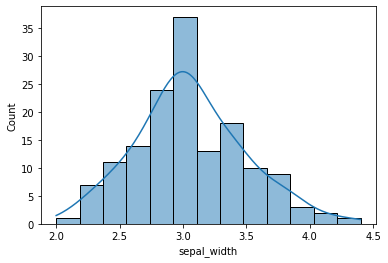

In [ ]:
sns.histplot(df1['sepal_width'], kde = True)

Gaussian Dirstibution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


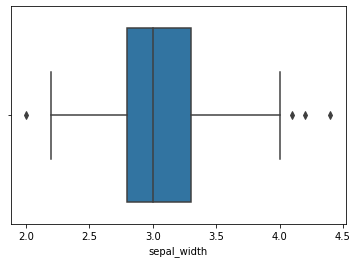

In [ ]:
sns.boxplot(df1['sepal_width'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


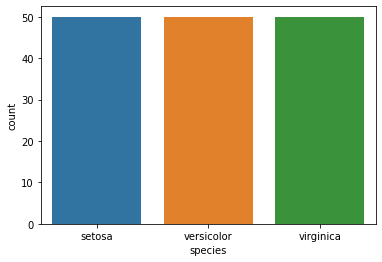

In [ ]:
sns.countplot(df1['species'])

In [ ]:
np.percentile(df1['sepal_length'], [25,50,75])

array([5.1, 5.8, 6.4])

# **Outlier detection**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [ ]:
dataset = []

for i in range(0, 20):
  d = np.random.randint(1000)
  dataset.append(d)

print(dataset)

[36, 82, 263, 889, 398, 304, 984, 690, 617, 142, 27, 293, 771, 779, 734, 18, 813, 617, 736, 996]


In [ ]:
dataset = [36, 82, 63, 88, 38, 30, 98, 6900, 617, 14, 27, 29, 71, 779, 734, 18, 813, 67, 73, 99]

In [ ]:
outlier = []

def outliers(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for j in data:
    z_score = (j - mean)/std
    if np.abs(z_score) > threshold:
      outlier.append(j)
    
  return outlier


In [ ]:
outliers(dataset)

[6900]

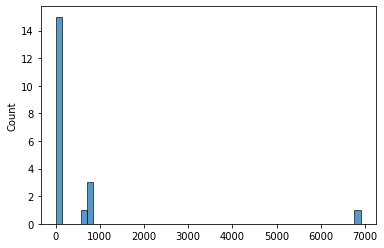

In [ ]:
sns.histplot(dataset)

In [ ]:
## finding Interquartile range (IQR)

dataset = sorted(dataset)
print(dataset)

[14, 18, 27, 29, 30, 36, 38, 63, 67, 71, 73, 82, 88, 98, 99, 617, 734, 779, 813, 6900]


In [ ]:
q1, q3 = np.percentile(dataset, [25,75])
print(q1, q3)

34.5 228.5


In [ ]:
iqr = q3 - q1
print(iqr)

194.0


In [ ]:
lowerfence = q1 - 1.5*iqr
upperfence = q3 + 1.5*iqr

print(lowerfence, upperfence)

-256.5 519.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


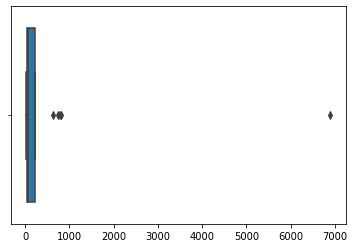

In [ ]:
sns.boxplot(dataset)

# **Z-test Value**

In [ ]:
from statsmodels.stats.weightstats import ztest as ztest

data = [1, 3, 5, 5, 22, 32, 2, 4, 11, 17, 13, 14, 19, 9, 8, 6, 15, 14, 25, 5, 17, 23, 28, 41]

ztest(data, value = 100) # value = mean

(-40.59129182997267, 0.0)

# **T Test**

In [ ]:
data = [1, 3, 5, 5, 22, 32, 2, 4, 11, 17, 13, 14, 19, 9, 8, 6, 15, 14, 25, 5, 17, 23, 28, 41]

In [ ]:
import numpy as np
data_mean = np.mean(data)
data_mean

14.125

In [ ]:
sample_size = 7
data_sample = np.random.choice(data, sample_size)
data_sample

array([ 5, 22, 22,  8,  4,  1, 11])

In [ ]:
from scipy.stats import ttest_1samp
ttest_1samp(data_sample, 14)

Ttest_1sampResult(statistic=-1.1113855611859675, pvalue=0.3089421567021136)

# **Stack Implementation in Python**

In [ ]:
class stack(object):
  def __init__(self):
    self.items = []
  def isEmpty(self):
    return self.items == []
  def pop(self):
    return self.items.pop()
  def push(self, item):
    return self.items.append(item)
  def peek(self):
    return self.items[len(self.items)-1]
  def size(self):
    return len(self.items)

In [ ]:
s = stack()

In [ ]:
s.push(3)

In [ ]:
s.peek()

3

In [ ]:
s.push(6)

In [ ]:
 s.size()

2

In [ ]:
s.pop()

6

In [ ]:
s.size()

1

In [ ]:
s.isEmpty()

False

In [ ]:
s.push('anything')

In [ ]:
s.peek() # finding topmost element

'anything'